In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D
from numba import set_num_threads
from numba import jit, njit, prange

In [11]:
nthreads = 12
set_num_threads(nthreads)

In [12]:
time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

In [13]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

running 全部


n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

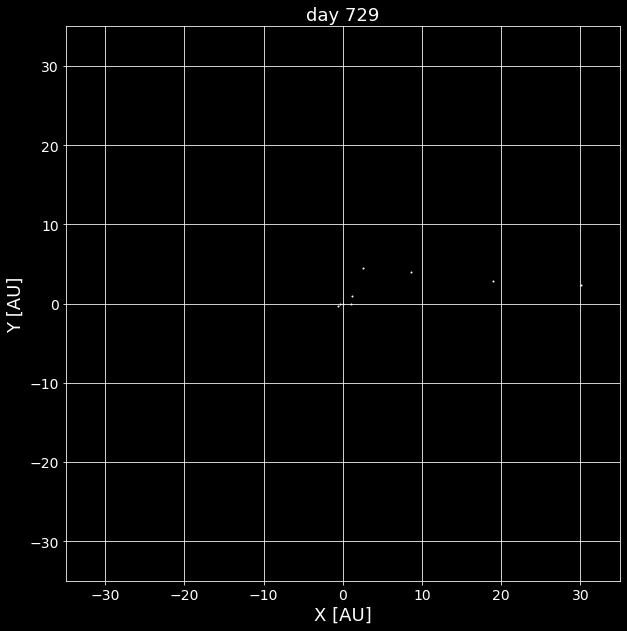

In [14]:
one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = 2*one_year)
fns = load_files('nbody')
print(fns)
save_movie(fns, lengthscale=35,filename='nbody_earth_sun.mp4', fps=20)

Only running 水星、金星、地球、火星

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

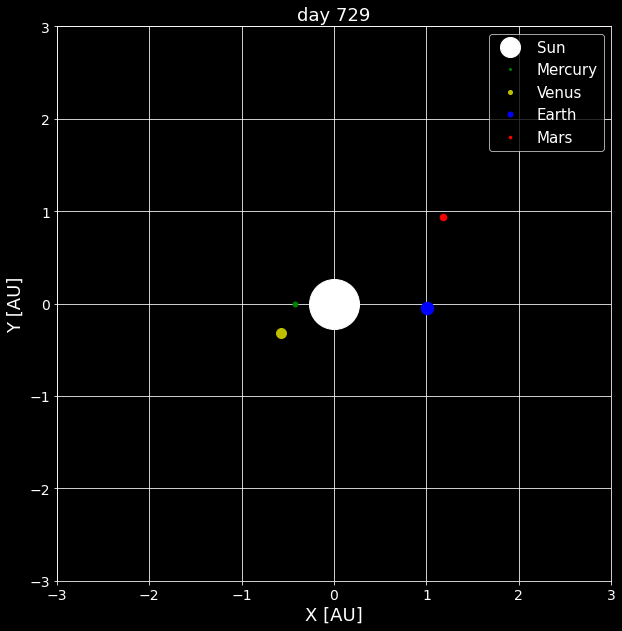

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange

nthreads = 12
set_num_threads(nthreads)

time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = one_year*2)

fns = load_files('nbody')
print(fns)
save_movie_inner(fns, lengthscale=3,filename='nbody_inner_sun.mp4', fps=20)

for 木星 土星 天王星 海王星

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

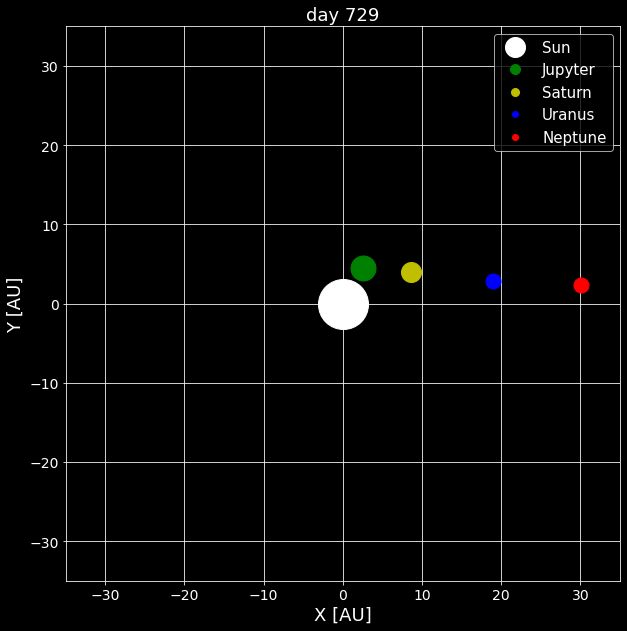

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0]])
velocity = np.array([[0,0,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = 2*one_year)

fns = load_files('nbody')
print(fns)
save_movie_outer(fns, lengthscale=35,filename='nbody_outer_sun.mp4', fps=20)

3D圖 inner

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

c:\Users\User\code\HW20529_1\nbodywork\visualization.py:236: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


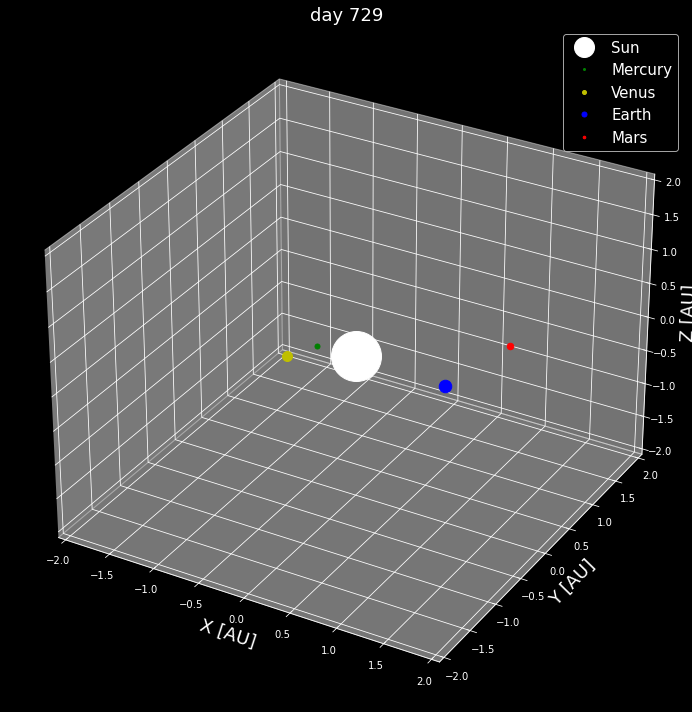

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D_inner
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = 2*one_year)

fns = load_files('nbody')
print(fns)
save_movie_3D_inner(fns, lengthscale=2,filename='nbody_inner_sun_3D.mp4', fps=20)

3D圖全部

n 0 Time 0 dt: 86457.33150684931
n 30 Time 2593719.9452054785 dt: 86457.33150684931
n 60 Time 5187439.890410957 dt: 86457.33150684931
n 90 Time 7781159.835616435 dt: 86457.33150684931
n 120 Time 10374879.780821934 dt: 86457.33150684931
n 150 Time 12968599.72602744 dt: 86457.33150684931
n 180 Time 15562319.671232946 dt: 86457.33150684931
n 210 Time 18156039.616438422 dt: 86457.33150684931
n 240 Time 20749759.561643872 dt: 86457.33150684931
n 270 Time 23343479.506849322 dt: 86457.33150684931
n 300 Time 25937199.452054773 dt: 86457.33150684931
n 330 Time 28530919.397260223 dt: 86457.33150684931
n 360 Time 31124639.342465673 dt: 86457.33150684931
n 390 Time 33718359.28767113 dt: 86457.33150684931
n 420 Time 36312079.23287658 dt: 86457.33150684931
n 450 Time 38905799.17808203 dt: 86457.33150684931
n 480 Time 41499519.12328748 dt: 86457.33150684931
n 510 Time 44093239.06849293 dt: 86457.33150684931
n 540 Time 46686959.01369838 dt: 86457.33150684931
n 570 Time 49280678.95890383 dt: 86457.3315

c:\Users\User\code\HW20529_1\nbodywork\visualization.py:193: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


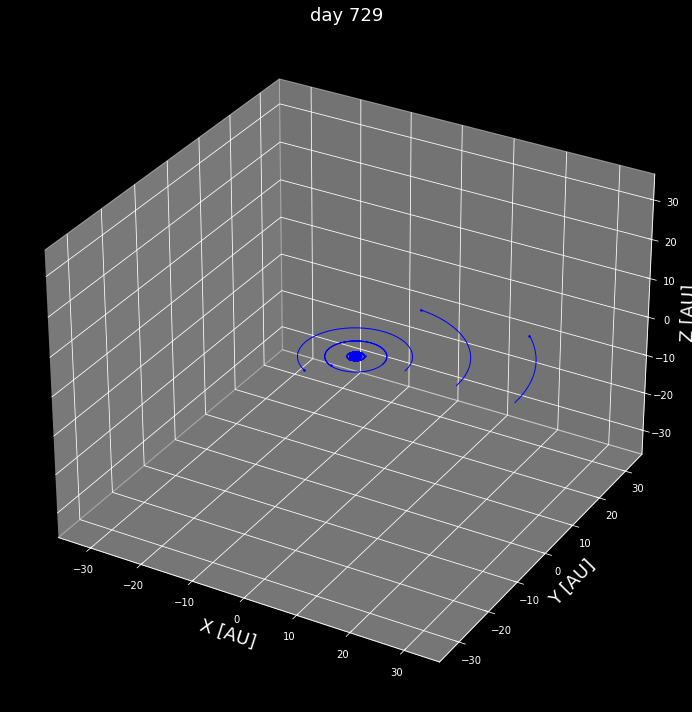

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D, save_movie_3D_inner
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

nthreads = 12
set_num_threads(nthreads)


Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = 2*one_year)

fns = load_files('nbody')
print(fns)
save_movie_3D(fns, lengthscale=35,filename='nbody_earth_sun_3D.mp4', fps=20)

模型的合理性1---軌道穩定性


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D, save_movie_3D_inner,save_movie_inner_check
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

nthreads = 12
set_num_threads(nthreads)


Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300,outheader='test')  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/36500, tmax = 50*one_year)



fns = load_files('test')
times = []
r_Sun = []
r_Mer = []
r_Ven = []
r_Ear = []
r_Mar = []
m_sun=[]
for fn in fns:
    tag, m, x, y, z, vx, vy, vz, ax, ay, az = np.loadtxt(fn)
    times.append(int(fn.split('_')[-1].split('.')[0])/100 )  # dt=1/10天
    r_Sun.append(np.sqrt((x[0]) ** 2 + (y[0]) ** 2))
    r_Mer.append(np.sqrt((x[1]) ** 2 + (y[1]) ** 2))
    r_Ven.append(np.sqrt((x[2]) ** 2 + (y[2]) ** 2))
    r_Ear.append(np.sqrt((x[3]) ** 2 + (y[3]) ** 2))
    r_Mar.append(np.sqrt((x[4]) ** 2 + (y[4]) ** 2))
    m_sun.append(m[0])


n 0 Time 0 dt: 864.5733150684931
n 30 Time 25937.199452054803 dt: 864.5733150684931
n 60 Time 51874.398904109534 dt: 864.5733150684931
n 90 Time 77811.59835616434 dt: 864.5733150684931
n 120 Time 103748.79780821926 dt: 864.5733150684931
n 150 Time 129685.99726027418 dt: 864.5733150684931
n 180 Time 155623.19671232908 dt: 864.5733150684931
n 210 Time 181560.396164384 dt: 864.5733150684931
n 240 Time 207497.59561643892 dt: 864.5733150684931
n 270 Time 233434.79506849384 dt: 864.5733150684931
n 300 Time 259371.99452054876 dt: 864.5733150684931
n 330 Time 285309.19397260365 dt: 864.5733150684931
n 360 Time 311246.39342465857 dt: 864.5733150684931
n 390 Time 337183.5928767135 dt: 864.5733150684931
n 420 Time 363120.7923287684 dt: 864.5733150684931
n 450 Time 389057.99178082333 dt: 864.5733150684931
n 480 Time 414995.19123287825 dt: 864.5733150684931
n 510 Time 440932.39068493317 dt: 864.5733150684931
n 540 Time 466869.5901369881 dt: 864.5733150684931
n 570 Time 492806.789589043 dt: 864.5733

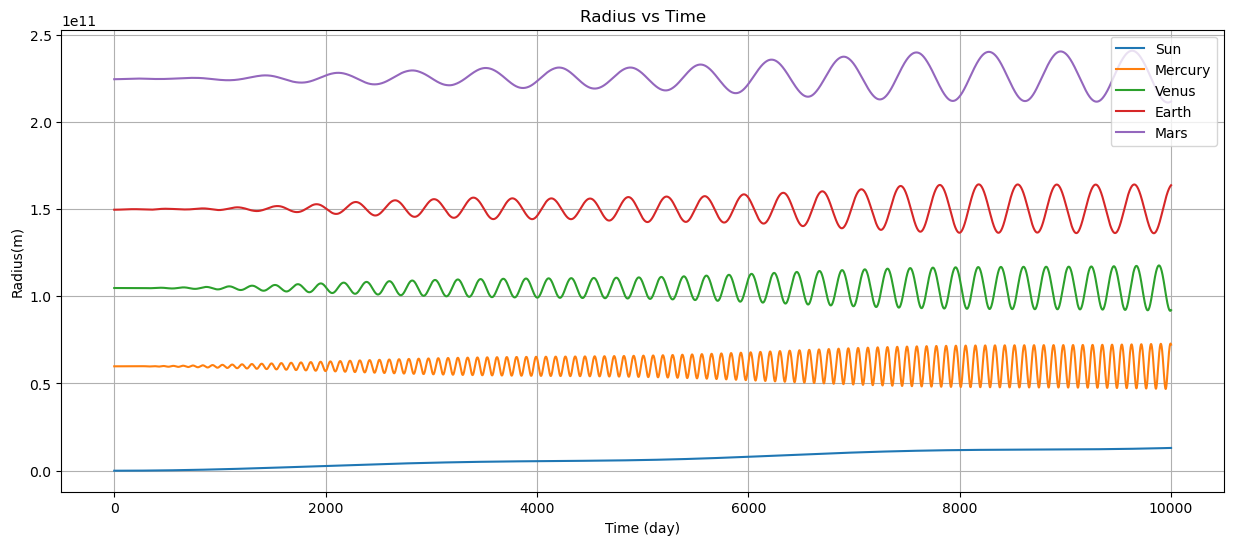

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(times, r_Sun, label='Sun')
plt.plot(times, r_Mer, label='Mercury')
plt.plot(times, r_Ven, label='Venus')
plt.plot(times, r_Ear, label='Earth')
plt.plot(times, r_Mar, label='Mars')
plt.xlabel('Time (day)')
plt.ylabel('Radius(m)')
plt.title('Radius vs Time')
plt.legend()
plt.grid(True)
plt.show()

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

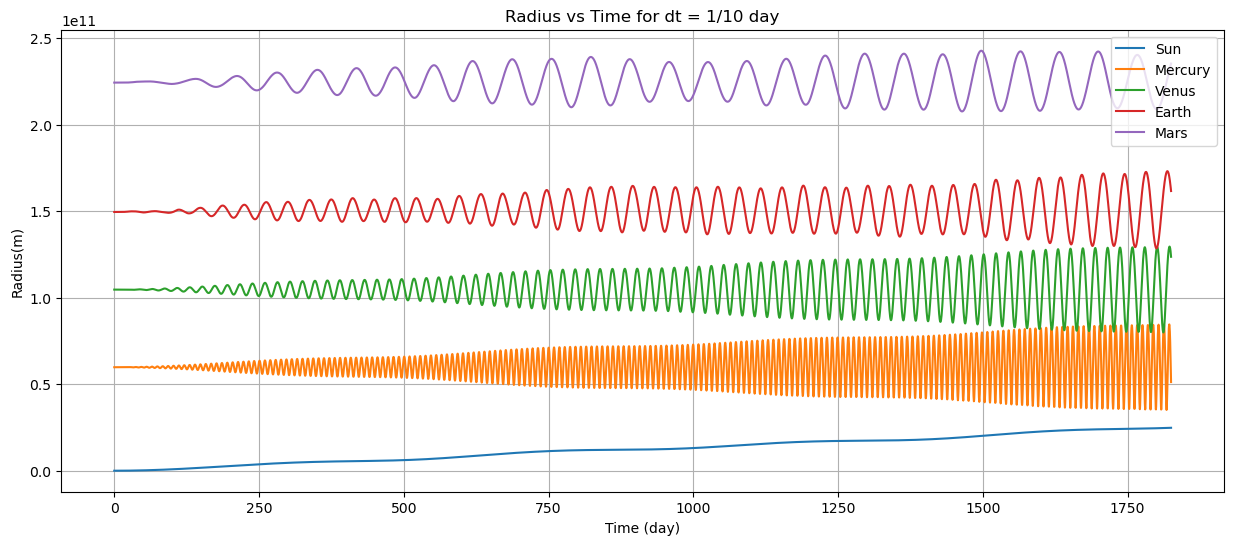

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D, save_movie_3D_inner,save_movie_inner_check
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

nthreads = 12
set_num_threads(nthreads)


Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=30,outheader='testten')  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/3650, tmax = 50*one_year)



fns = load_files('testten')
times = []
r_Sun = []
r_Mer = []
r_Ven = []
r_Ear = []
r_Mar = []
m_sun=[]
for fn in fns:
    tag, m, x, y, z, vx, vy, vz, ax, ay, az = np.loadtxt(fn)
    times.append(int(fn.split('_')[-1].split('.')[0])/10 )  # dt=1/10天
    r_Sun.append(np.sqrt((x[0]) ** 2 + (y[0]) ** 2))
    r_Mer.append(np.sqrt((x[1]) ** 2 + (y[1]) ** 2))
    r_Ven.append(np.sqrt((x[2]) ** 2 + (y[2]) ** 2))
    r_Ear.append(np.sqrt((x[3]) ** 2 + (y[3]) ** 2))
    r_Mar.append(np.sqrt((x[4]) ** 2 + (y[4]) ** 2))
    m_sun.append(m[0])


plt.figure(figsize=(15, 6))
plt.plot(times, r_Sun, label='Sun')
plt.plot(times, r_Mer, label='Mercury')
plt.plot(times, r_Ven, label='Venus')
plt.plot(times, r_Ear, label='Earth')
plt.plot(times, r_Mar, label='Mars')
plt.xlabel('Time (day)')
plt.ylabel('Radius(m)')
plt.title('Radius vs Time for dt = 1/10 day')
plt.legend()
plt.grid(True)
plt.show()

n 0 Time 0 dt: 86457.33150684931
n 30 Time 2593719.9452054785 dt: 86457.33150684931
n 60 Time 5187439.890410957 dt: 86457.33150684931
n 90 Time 7781159.835616435 dt: 86457.33150684931
n 120 Time 10374879.780821934 dt: 86457.33150684931
n 150 Time 12968599.72602744 dt: 86457.33150684931
n 180 Time 15562319.671232946 dt: 86457.33150684931
n 210 Time 18156039.616438422 dt: 86457.33150684931
n 240 Time 20749759.561643872 dt: 86457.33150684931
n 270 Time 23343479.506849322 dt: 86457.33150684931
n 300 Time 25937199.452054773 dt: 86457.33150684931
n 330 Time 28530919.397260223 dt: 86457.33150684931
n 360 Time 31124639.342465673 dt: 86457.33150684931
n 390 Time 33718359.28767113 dt: 86457.33150684931
n 420 Time 36312079.23287658 dt: 86457.33150684931
n 450 Time 38905799.17808203 dt: 86457.33150684931
n 480 Time 41499519.12328748 dt: 86457.33150684931
n 510 Time 44093239.06849293 dt: 86457.33150684931
n 540 Time 46686959.01369838 dt: 86457.33150684931
n 570 Time 49280678.95890383 dt: 86457.3315

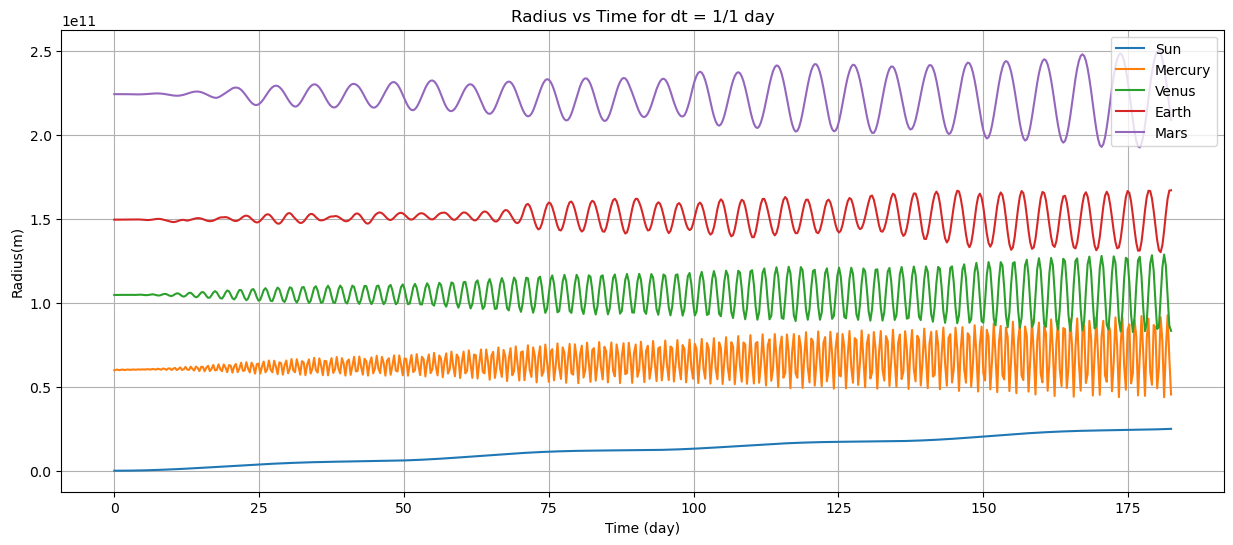

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner, save_movie_3D, save_movie_3D_inner,save_movie_inner_check
from numba import set_num_threads
from numba import jit, njit, prange
time = 0
AU = 149597870895          #天文單位換算成米

nthreads = 12
set_num_threads(nthreads)


Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=3,outheader='testone')  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/365, tmax = 50*one_year)



fns = load_files('testone')
times = []
r_Sun = []
r_Mer = []
r_Ven = []
r_Ear = []
r_Mar = []
m_sun=[]
for fn in fns:
    tag, m, x, y, z, vx, vy, vz, ax, ay, az = np.loadtxt(fn)
    times.append(int(fn.split('_')[-1].split('.')[0])/1 )  # dt=1/10天
    r_Sun.append(np.sqrt((x[0]) ** 2 + (y[0]) ** 2))
    r_Mer.append(np.sqrt((x[1]) ** 2 + (y[1]) ** 2))
    r_Ven.append(np.sqrt((x[2]) ** 2 + (y[2]) ** 2))
    r_Ear.append(np.sqrt((x[3]) ** 2 + (y[3]) ** 2))
    r_Mar.append(np.sqrt((x[4]) ** 2 + (y[4]) ** 2))
    m_sun.append(m[0])


plt.figure(figsize=(15, 6))
plt.plot(times, r_Sun, label='Sun')
plt.plot(times, r_Mer, label='Mercury')
plt.plot(times, r_Ven, label='Venus')
plt.plot(times, r_Ear, label='Earth')
plt.plot(times, r_Mar, label='Mars')
plt.xlabel('Time (day)')
plt.ylabel('Radius(m)')
plt.title('Radius vs Time for dt = 1/1 day')
plt.legend()
plt.grid(True)
plt.show()

模型的合理性2

蔣秉諭的

n 0 Time 0 dt: 864.5733150684931
n 300 Time 259371.99452054876 dt: 864.5733150684931
n 600 Time 518743.9890410979 dt: 864.5733150684931
n 900 Time 778115.9835616471 dt: 864.5733150684931
n 1200 Time 1037487.9780821963 dt: 864.5733150684931
n 1500 Time 1296859.972602712 dt: 864.5733150684931
n 1800 Time 1556231.9671232263 dt: 864.5733150684931
n 2100 Time 1815603.9616437405 dt: 864.5733150684931
n 2400 Time 2074975.9561642548 dt: 864.5733150684931
n 2700 Time 2334347.950684833 dt: 864.5733150684931
n 3000 Time 2593719.945205417 dt: 864.5733150684931
n 3300 Time 2853091.939726001 dt: 864.5733150684931
n 3600 Time 3112463.9342465852 dt: 864.5733150684931
n 3900 Time 3371835.9287671694 dt: 864.5733150684931
n 4200 Time 3631207.9232877535 dt: 864.5733150684931
n 4500 Time 3890579.9178083376 dt: 864.5733150684931
n 4800 Time 4149951.9123289217 dt: 864.5733150684931
n 5100 Time 4409323.90684939 dt: 864.5733150684931
n 5400 Time 4668695.901369834 dt: 864.5733150684931
n 5700 Time 4928067.89589

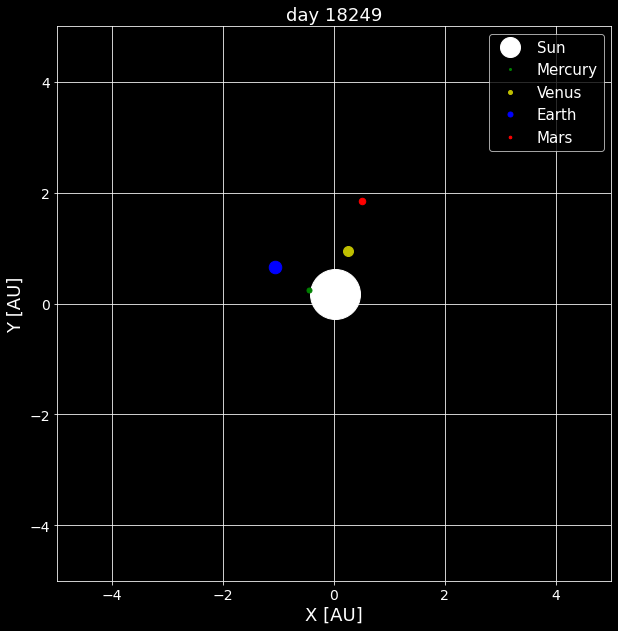

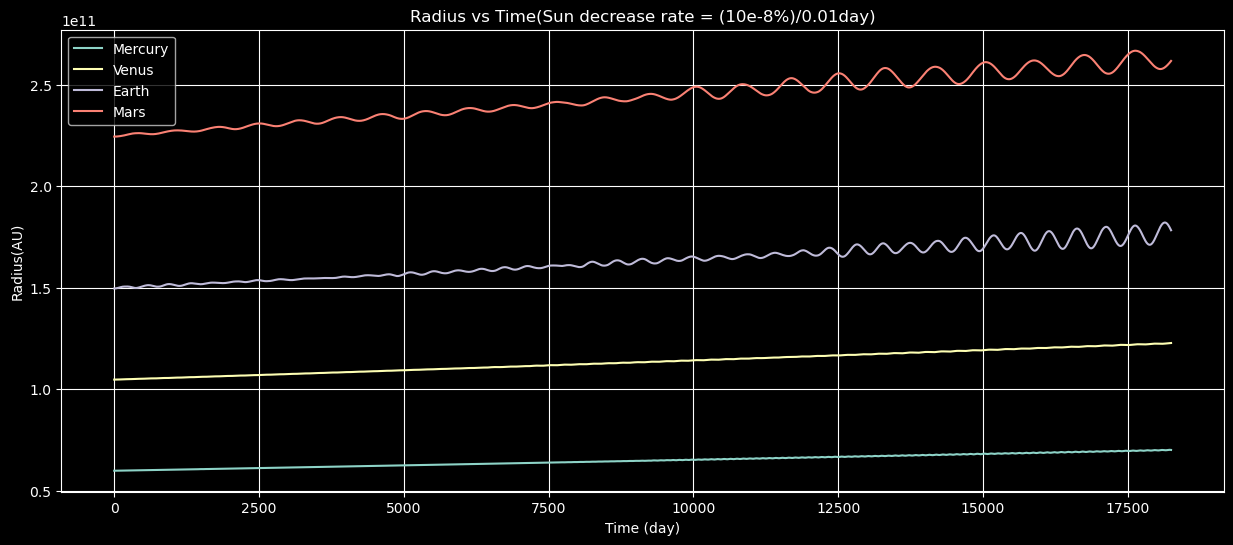

Text(0, 0.5, 'sun mass')

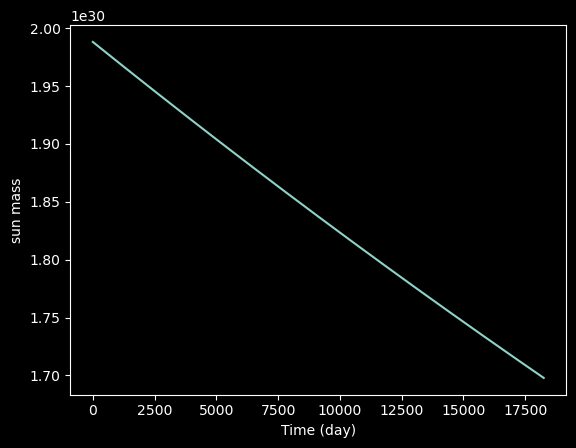

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange

nthreads = 12
set_num_threads(nthreads)

time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=300,outheader='Jiang')  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
#simulation.evolve(dt = one_year/3650, tmax = one_year*2)
simulation.evolve_sun_mass_decreace(dt=one_year/36500, tmax=one_year*50,d=1e-10)#每經過一個dt，太陽本身會減少多少的太陽質量
fns = load_files('Jiang')
print(fns)
save_movie_inner(fns, lengthscale=5,filename='Sun_mass_decreases_inner_.mp4', fps=20)

fns = load_files('Jiang')
times = []
r_Mer = []
r_Ven = []
r_Ear = []
r_Mar = []
m_sun=[]
for fn in fns:
    tag, m, x, y, z, vx, vy, vz, ax, ay, az = np.loadtxt(fn)
    times.append(int(fn.split('_')[-1].split('.')[0])/100  )  # dt=1/10天
    r_Mer.append(np.sqrt((x[1] - x[0]) ** 2 + (y[1] - y[0]) ** 2))
    r_Ven.append(np.sqrt((x[2] - x[0]) ** 2 + (y[2] - y[0]) ** 2))
    r_Ear.append(np.sqrt((x[3] - x[0]) ** 2 + (y[3] - y[0]) ** 2))
    r_Mar.append(np.sqrt((x[4] - x[0]) ** 2 + (y[4] - y[0]) ** 2))
    m_sun.append(m[0])

plt.figure(figsize=(15, 6))
plt.plot(times, r_Mer, label='Mercury')
plt.plot(times, r_Ven, label='Venus')
plt.plot(times, r_Ear, label='Earth')
plt.plot(times, r_Mar, label='Mars')
plt.xlabel('Time (day)')
plt.ylabel('Radius(AU)')
plt.title('Radius vs Time(Sun decrease rate = (10e-8%)/0.01day)')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(times,m_sun)
plt.xlabel('Time (day)')
plt.ylabel('sun mass')

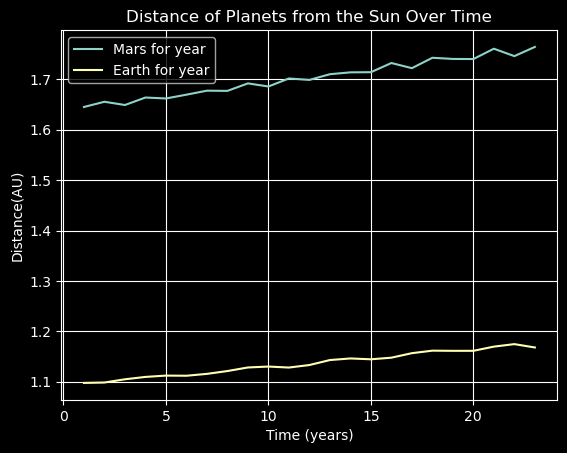

[164031528901.50946, 164035100577.91083, 164037625279.65106, 164039402011.56265, 164042113415.03973, 164044582821.30133, 164045645861.3863, 164045580341.25314, 164043981821.13632, 164042330913.88214, 164040486551.64203, 164038446721.2895, 164036926221.86804, 164035331693.45557, 164032834373.39047, 164029671838.9133, 164025953271.7115, 164022339530.14572, 164019280194.46524, 164016691284.18027, 164013415134.96143, 164009905266.3127, 164007152988.0223, 164004302909.72665, 164000903385.46832, 163996475200.70743, 163992129276.85153, 163987699036.77078, 163983824804.12646, 163979924224.43845, 163975651878.91403, 163971159961.13535, 163966641096.69525, 163962284888.571, 163957499280.21768, 163952365978.78433, 163946664479.58395, 163940541202.98166, 163934253346.1677, 163928462887.93253, 163923980717.2232, 163920362560.89017, 163916459436.04926, 163912664750.9013, 163909072397.46906, 163904991564.54333, 163901169392.07233, 163897782841.04477, 163894232897.64923, 163892015246.52396, 1638903492

In [2]:
#資料處理計算平均半徑
def block_average(data, block_size):
    block_size = int(block_size)  # 確保 block_size 是整數
    n_blocks = len(data) // block_size
    averages = [np.mean(data[i*block_size:(i+1)*block_size]) for i in range(n_blocks)]
    
    # 處理最後一個區塊元素不足的情況
    if len(data) % block_size != 0:
        last_block = data[n_blocks*block_size:]
        averages.append(np.mean(last_block))
    
    return averages

# 計算 r_Mar 的區塊平均值
block_size = 366/3
r_Ear_avg = np.array(block_average(r_Ear, block_size))
r_Mar_avg = np.array(block_average(r_Mar, block_size))
r_Ear_avg_AU=r_Ear_avg/AU
r_Mar_avg_AU=r_Mar_avg/AU


yn = len(r_Mar_avg) 
t_y = list(range(1, yn+1)) #幾年

plt.plot(t_y, r_Mar_avg_AU, label='Mars for year')
plt.plot(t_y, r_Ear_avg_AU, label='Earth for year')

plt.xlabel('Time (years)')
plt.ylabel('Distance(AU)')
plt.title('Distance of Planets from the Sun Over Time')
plt.legend()
plt.grid(True)
plt.show()

print(r_Ear)


[1.9817976172948793e+30, 1.9754852110843953e+30, 1.9691929111006196e+30, 1.9629206533013557e+30, 1.9566683738484287e+30, 1.950436009106883e+30, 1.9442234956445846e+30, 1.9380307702313875e+30, 1.9318577698385423e+30, 1.9257044316380913e+30, 1.91957069300218e+30, 1.9134564915024e+30, 1.9073617649092267e+30, 1.9012864511913505e+30, 1.8952304885150354e+30, 1.8891938152434778e+30, 1.883176369936228e+30, 1.8771780913485523e+30, 1.8711989184307136e+30, 1.865238790327502e+30, 1.8592976463775124e+30, 1.8533754261126053e+30, 1.8474720692571823e+30, 1.8415875157276655e+30, 1.8357217056318455e+30, 1.8298745792682662e+30, 1.8240460771257096e+30, 1.823431142368051e+30]
[-0.3185192148480026, -0.31851921484755963, -0.3185192148471741, -0.318519214845059, -0.3185192148472055, -0.31851921484690027, -0.31851921484695483, -0.31851921484756324, -0.3185192148470275, -0.31851921484615414, -0.3185192148468101, -0.31851921484704776, -0.3185192148467599, -0.31851921484637075, -0.31851921484692247, -0.3185192148

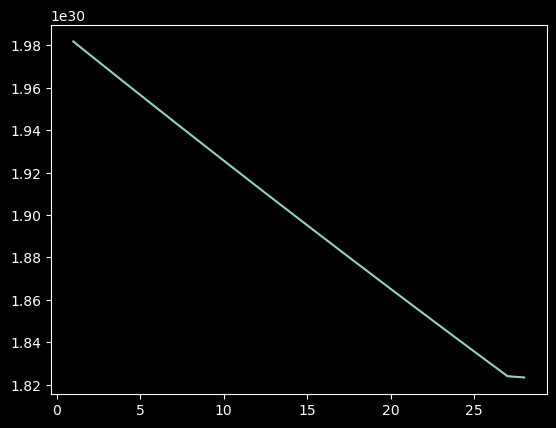

In [12]:
#測試每年太陽質量減少幾趴
index = 122
m_sun_year=m_sun[index::index+1]
m_sun_final=m_sun[-1:]
m_sun_every_year=m_sun_year+m_sun_final
plt.plot(t_y, m_sun_every_year)
print(m_sun_every_year)

delta_m=[]
for i in range (len(m_sun_every_year)-1):
   a=(m_sun_every_year[i+1]-m_sun_every_year[i])/m_sun_every_year[i]*100
   delta_m.append(a)

print( delta_m) #每年太陽質量減少幾趴

In [13]:
#計算地球平均半徑一年增加多少
delta_r_Ear=[]
delta_r_Ear_percent=[]
for i in range (len(r_Ear_avg)-1):
   a=r_Ear_avg[i+1]-r_Ear_avg[i]
   b=(r_Ear_avg[i+1]-r_Ear_avg[i])/r_Ear_avg[i]*100
   delta_r_Ear.append(a)
   delta_r_Ear_percent.append(b)

print( delta_r_Ear) #地球平均半徑一年增加多少
print( delta_r_Ear_percent)#地球半徑每年增加幾趴

[385983597.52941895, 726433949.844696, 428074494.5720215, 512438407.0542908, 332951089.56884766, 654001703.8244324, 379707954.3434448, 560104876.831604, 528657454.92059326, 389091986.9029236, 414685579.7979431, 493962610.4921875, 628216439.5887451, 565959916.462616, 562329708.0422668, 450515427.92892456, 434856700.28289795, 675334932.8178711, 435651197.59780884, 364830660.1508484, 384250239.6971741, 434436123.7720642, 462209614.3905029, 766524349.0774841, 819968327.7139282, 573933328.1310425, -1379397288.5542297]
[0.2571131393507013, 0.4826544993687812, 0.28305346746203514, 0.33788059497452666, 0.21879484976962466, 0.42883118313916296, 0.24791269430963098, 0.3647901352643602, 0.3430573365271396, 0.2516270396088892, 0.2675053825916933, 0.31779529171863813, 0.4028883409357067, 0.3615054672713693, 0.3578928784884915, 0.285706527274523, 0.2749904565038951, 0.42589058703838123, 0.27357225297311466, 0.2284746269221037, 0.24008756888238095, 0.27079461240629205, 0.2873284353387284, 0.475137737

張瑋中的

n 0 Time 0 dt: 864.5733150684931
n 300 Time 259371.99452054876 dt: 864.5733150684931
n 600 Time 518743.9890410979 dt: 864.5733150684931
n 900 Time 778115.9835616471 dt: 864.5733150684931
n 1200 Time 1037487.9780821963 dt: 864.5733150684931
n 1500 Time 1296859.972602712 dt: 864.5733150684931
n 1800 Time 1556231.9671232263 dt: 864.5733150684931
n 2100 Time 1815603.9616437405 dt: 864.5733150684931
n 2400 Time 2074975.9561642548 dt: 864.5733150684931
n 2700 Time 2334347.950684833 dt: 864.5733150684931
n 3000 Time 2593719.945205417 dt: 864.5733150684931
n 3300 Time 2853091.939726001 dt: 864.5733150684931
n 3600 Time 3112463.9342465852 dt: 864.5733150684931
n 3900 Time 3371835.9287671694 dt: 864.5733150684931
n 4200 Time 3631207.9232877535 dt: 864.5733150684931
n 4500 Time 3890579.9178083376 dt: 864.5733150684931
n 4800 Time 4149951.9123289217 dt: 864.5733150684931
n 5100 Time 4409323.90684939 dt: 864.5733150684931
n 5400 Time 4668695.901369834 dt: 864.5733150684931
n 5700 Time 4928067.89589

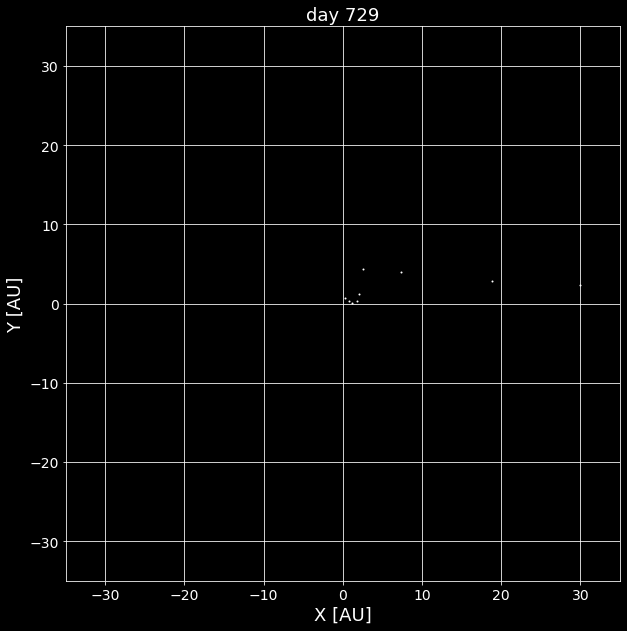

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange
import glob

nthreads = 8
set_num_threads(nthreads)


time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,332900*Earth_Mass*0.3,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47089.036,0],[0,35595.965,0],[0,29781.721,0],[0,24316.674,0],[0,13060.149,0],[0,9662.466,0],[0,6796.717,0],[0,5428.334,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag



one_year = 31556926
simulation = NBodySimulator(particles=particles)
outfreq=300
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=outfreq,outheader='Chang')  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
dt = one_year/36500
tmax = 2*one_year
simulation.evolve(dt=dt, tmax=tmax)
fns = load_files('Chang')
save_movie(fns, lengthscale=35,filename='Jupyter_altering.mp4', fps=20)

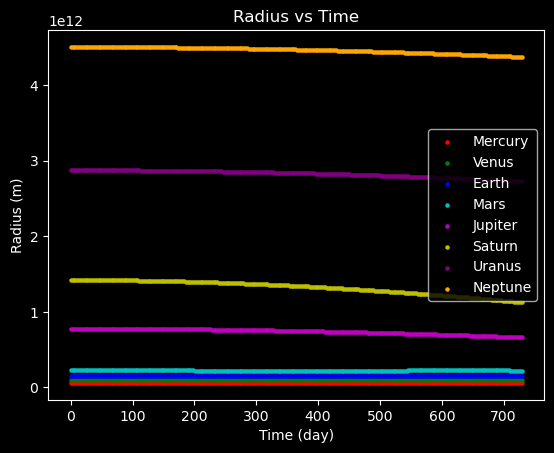

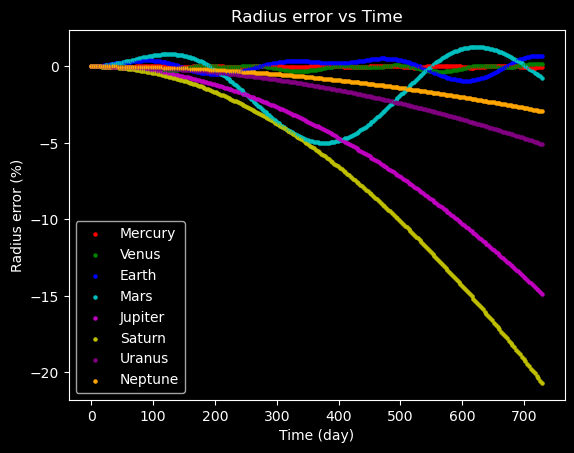

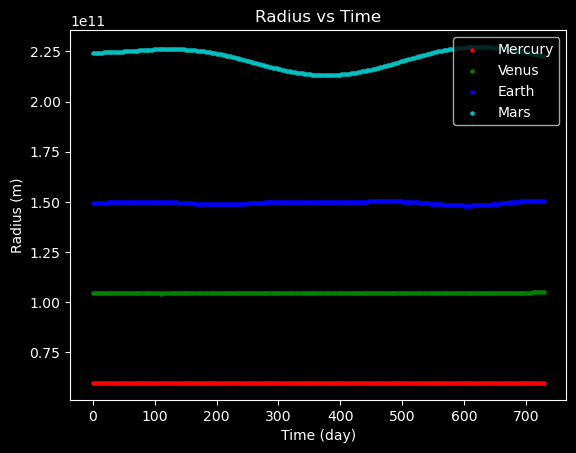

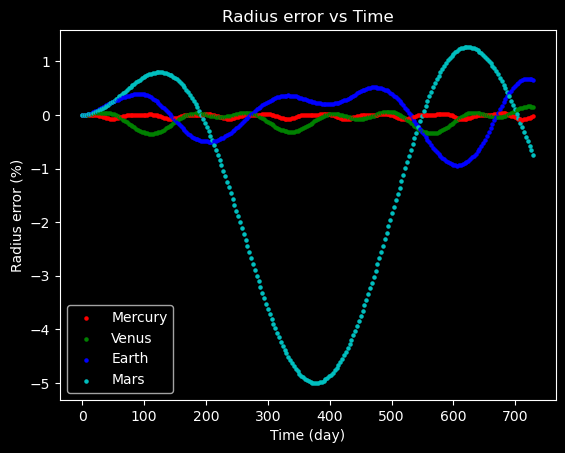

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# 定義檔案路徑模式
file_pattern = 'data_Chang\\Chang_*.dat'

# 使用 glob 模組自動找到所有匹配的檔案
file_paths = sorted(glob.glob(file_pattern))




# 初始化變量以控制標籤顯示
labels_shown1 = {
    "Mercury": False,
    "Venus": False,
    "Earth": False,
    "Mars": False,
    "Jupiter": False,
    "Saturn": False,
    "Uranus": False,
    "Neptune": False
}
labels_shown2 = {
    "Mercury": False,
    "Venus": False,
    "Earth": False,
    "Mars": False,
    "Jupiter": False,
    "Saturn": False,
    "Uranus": False,
    "Neptune": False
}
labels_shown3 = {
    "Mercury": False,
    "Venus": False,
    "Earth": False,
    "Mars": False
}
labels_shown4 = {
    "Mercury": False,
    "Venus": False,
    "Earth": False,
    "Mars": False
}


# 讀取每個檔案並畫出位置散佈圖
for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)

    sunx = data[2, 0]
    suny = data[3, 0]

    planet_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
    planet_colors = ["r", "g", "b", "c", "m", "y", "purple", "orange"]

    for i, (planet, color) in enumerate(zip(planet_names, planet_colors)):
        planetx = data[2, i+1]
        planety = data[3, i+1]
        planetrad = np.sqrt((planetx - sunx)**2 + (planety - suny)**2)

        if not labels_shown1[planet]:            
            plt.scatter(3*idx, planetrad, color=color, label=planet, s = 5)            
            labels_shown1[planet] = True
        else:
            plt.scatter(3*idx, planetrad, color=color, s = 5 )

plt.xlabel('Time (day)')
plt.ylabel('Radius (m)')
plt.legend()
plt.title('Radius vs Time')
plt.show()

basic = np.zeros(8)
for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path) 

    if idx == 0 :
        for i in range (8):
            basic[i] = np.sqrt((data[2,i+1]-data[2,0])**2+(data[3,i+1]-data[3,0])**2)
    
  
    sunx = data[2, 0]
    suny = data[3, 0]


    planet_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
    planet_colors = ["r", "g", "b", "c", "m", "y", "purple", "orange"]

    for i, (planet, color) in enumerate(zip(planet_names, planet_colors)):
        planetx = data[2, i+1]
        planety = data[3, i+1]
        planetrad = np.sqrt((planetx - sunx)**2 + (planety - suny)**2)

        if not labels_shown2[planet]:            
            plt.scatter(3*idx, (planetrad/basic[i]-1)*100, color=color, label=planet, s = 5)            
            labels_shown2[planet] = True
        else:
            plt.scatter(3*idx, (planetrad/basic[i]-1)*100, color=color, s = 5 )

plt.xlabel('Time (day)')
plt.ylabel('Radius error (%)')
plt.legend()
plt.title('Radius error vs Time')
plt.show()

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path)

    sunx = data[2, 0]
    suny = data[3, 0]

    planet_names = ["Mercury", "Venus", "Earth", "Mars"]
    planet_colors = ["r", "g", "b", "c"]

    for i, (planet, color) in enumerate(zip(planet_names, planet_colors)):
        planetx = data[2, i+1]
        planety = data[3, i+1]
        planetrad = np.sqrt((planetx - sunx)**2 + (planety - suny)**2)

        if not labels_shown3[planet]:            
            plt.scatter(3*idx, planetrad, color=color, label=planet, s = 5)            
            labels_shown3[planet] = True
        else:
            plt.scatter(3*idx, planetrad, color=color, s = 5 )

plt.xlabel('Time (day)')
plt.ylabel('Radius (m)')
plt.legend()
plt.title('Radius vs Time')
plt.show()

for idx, file_path in enumerate(file_paths):
    data = np.loadtxt(file_path) 

    
    
  
    sunx = data[2, 0]
    suny = data[3, 0]


    planet_names = ["Mercury", "Venus", "Earth", "Mars"]
    planet_colors = ["r", "g", "b", "c"]

    for i, (planet, color) in enumerate(zip(planet_names, planet_colors)):
        planetx = data[2, i+1]
        planety = data[3, i+1]
        planetrad = np.sqrt((planetx - sunx)**2 + (planety - suny)**2)

        if not labels_shown4[planet]:            
            plt.scatter(3*idx, (planetrad/basic[i]-1)*100, color=color, label=planet, s = 5)            
            labels_shown4[planet] = True
        else:
            plt.scatter(3*idx, (planetrad/basic[i]-1)*100, color=color, s = 5 )

plt.xlabel('Time (day)')
plt.ylabel('Radius error (%)')
plt.legend()
plt.title('Radius error vs Time')
plt.show()